In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from scipy.optimize import curve_fit

In [2]:
from deformationrate_spectrum import *

In [3]:
pltt = sbn.color_palette([c['color'] for c in plt.rcParams['axes.prop_cycle']])
pltt

[(0.0, 0.18823529411764706, 0.43529411764705883),
 (0.0, 0.6235294117647059, 0.5058823529411764),
 (0.6431372549019608, 0.00392156862745098, 0.13333333333333333),
 (1.0, 0.43137254901960786, 0.22745098039215686),
 (0.5176470588235295, 0.0, 0.803921568627451),
 (0.0, 0.5529411764705883, 0.9764705882352941),
 (0.0, 0.5843137254901961, 0.011764705882352941),
 (0.0, 0.7607843137254902, 0.9764705882352941),
 (0.8862745098039215, 0.00392156862745098, 0.20392156862745098),
 (1.0, 0.7647058823529411, 0.23137254901960785)]

In [4]:
def weibull_dist(x, lmda, q):
    return x ** (q - 1) / lmda ** q * np.exp(-(x / lmda) ** q)

In [5]:
def weibull_cumul(x, lmda, q):
    return 1 - np.exp(-(x / lmda) ** q)

In [6]:
lmda0 = 5e-4
q0 = 1.2

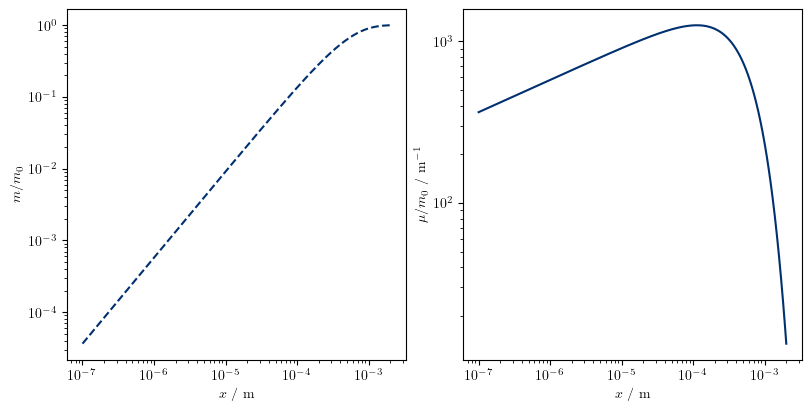

In [7]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2, sharex=True,
    constrained_layout=True
)

xp = powspace(1e-7, 2e-3, 300)

ax1.plot(xp, weibull_cumul(xp, lmda0, q0), '--', color=pltt[0])
ax1.set(
    xscale='log', yscale='log',
    xlabel=r'$x\ /\ \mathrm{m}$', ylabel=r'$m/m_0$'
)
# ax1.legend(loc='lower right')
ax2.plot(xp, weibull_dist(xp, lmda0, q0), color=pltt[0])
ax2.set(
    xscale='log', yscale='log',
    xlabel=r'$x\ /\ \mathrm{m}$', ylabel=r'$\mu/m_0\ /\ \mathrm{m^{-1}}$'
)
# ax2.legend(loc='lower left')
fig.set_size_inches(8, 4)

In [8]:
find_opts = dict(maxiter=10000, gtol=1e-40, xtol=1e-40, barrier_tol=1e-40, verbose=1)

In [9]:
q2 = 4

In [10]:
exbase = WeibullBase(
    q=q2,
    m0=1.,
    rho=2.8e3,
    lmbmin=1e-5,
    lmbmax=2e-3,
    nterms=20
)

In [11]:
spec = Spectrum(
    target=lambda x: weibull_dist(x, lmda0, q0),
    base=exbase,
    xmin=1e-5,
    xmax=2e-3,
)
spec.aconstr1 = 25
spec.aconstr2 = 12.5

In [12]:
res = spec.find_spectrum(options=find_opts)

`xtol` termination condition is satisfied.
Number of iterations: 4981, function evaluations: 38661, CG iterations: 8713, optimality: 8.08e-08, constraint violation: 0.00e+00, execution time: 8.4e+01 s.


In [13]:
res['tr_radius']

5.540811561316312e-41

In [14]:
res

           message: `xtol` termination condition is satisfied.
           success: True
            status: 2
               fun: 0.005151547315287111
                 x: [ 6.435e-03  2.968e-02 ...  2.408e-03  2.459e-03]
               nit: 4981
              nfev: 38661
              njev: 1841
              nhev: 0
          cg_niter: 8713
      cg_stop_cond: 2
              grad: [ 2.853e-04  1.061e-04 ...  4.518e-04  4.211e-04]
   lagrangian_grad: [ 9.846e-09  3.086e-08 ...  2.305e-09  2.373e-09]
            constr: [array([ 8.215e-01,  8.215e-01, ...,  8.215e-01,
                            8.215e-01]), array([ 1.012e+00,  1.001e+00, ...,  1.035e+00,
                            1.038e+00]), array([ 1.059e+00,  1.070e+00, ...,  1.035e+00,
                            1.033e+00]), array([ 1.042e+00,  1.059e+00, ...,  1.034e+00,
                            1.035e+00]), array([ 1.029e+00,  1.012e+00, ...,  1.037e+00,
                            1.035e+00]), array([ 5.008e-01,  5.066e-0

In [15]:
exbase.a_s.sum()

0.8282453606761956

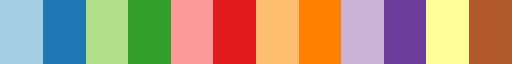

In [16]:
pc = plt.cm.Paired
pc

In [17]:
def power(x, a, b):
    return a * x ** b

In [18]:
def model1(x, a, lmda, q):
    return a * weibull_dist(x, lmda, q)

In [19]:
afit = curve_fit(
    model1,
    exbase.lmdas, exbase.a_s,
    bounds=((0, 0, 2.07), (1e-2, 8.5e-4, 4.))
)
afit

(array([2.33361837e-04, 8.50000000e-04, 2.07000000e+00]),
 array([[ 2.48711759e-11,  2.56024909e-11,  5.19125294e-08],
        [ 2.56024909e-11,  1.86602560e-10, -2.09200010e-07],
        [ 5.19125294e-08, -2.09200010e-07,  8.92727431e-04]]))

In [20]:
exbapr = WeibullBase(
    q=q2,
    rho=2.8e3,
    lmbmin=1e-5,
    lmbmax=2e-3,
    nterms=20
)
exbapr.a_s = model1(exbapr.lmdas, *afit[0])

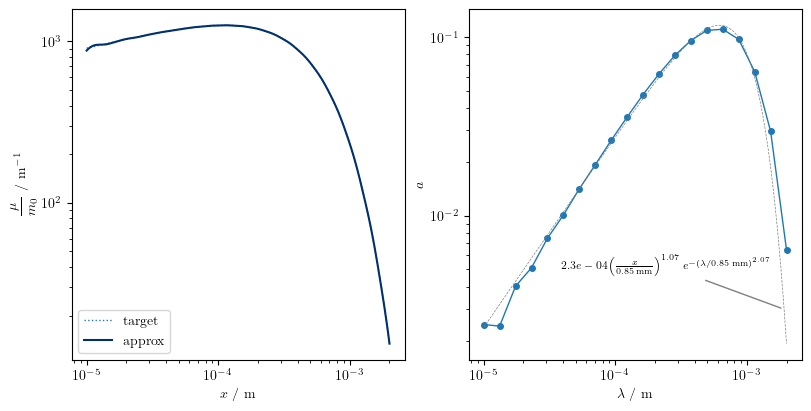

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)

xp = powspace(1e-5, 2e-3, 300)
lp = powspace(1e-5, 2e-3, 200)

ax1.plot(xp, weibull_dist(xp, lmda0, q0), color=pc(1), ls='dotted', lw=1, label=r'target')
ax1.plot(xp, exbase.mu(xp), label='approx')
# ax1.plot(xp, exbapr.mu(xp), label='approx2')
ax1.set(
    xscale='log', yscale='log',
    xlabel=r'$x\ /\ \mathrm{m}$',
    ylabel=r'$\dfrac{\mu}{m_0}\ /\ \mathrm{m^{-1}}$'
)
ax1.legend(loc='lower left')
ax2.plot(exbase.lmdas, spec.a, 'o-', lw=1, ms=4, color=pc(1))
ax2.plot(lp, model1(lp, *afit[0]), color='gray', ls='dashed', lw=.5)
ax2.annotate(
    r'$%.1e\Bigl(\frac{x}{%.2f\,\mathrm{mm}}\Bigr)^{%.2f}\,e^{-(\lambda/%.2f\,\mathrm{mm})^{%.2f}}$' % (
        afit[0][0], afit[0][1] * 1e3, afit[0][2] - 1, afit[0][1] * 1e3, afit[0][2]
    ),
    xy=(1.9e-3, 3e-3), xytext=(1.5e-3, 5e-3),
    ha='right', fontsize=8,
    arrowprops=dict(arrowstyle='-', color='gray')
)
ax2.set(
    xscale='log', yscale='log',
    xlabel=r'$\lambda\ /\ \mathrm{m}$',
    ylabel=r'$a$',
    # ylim=(8e-4, None)
)
# ax2.legend(loc='upper left')
fig.set_size_inches(8, 4)

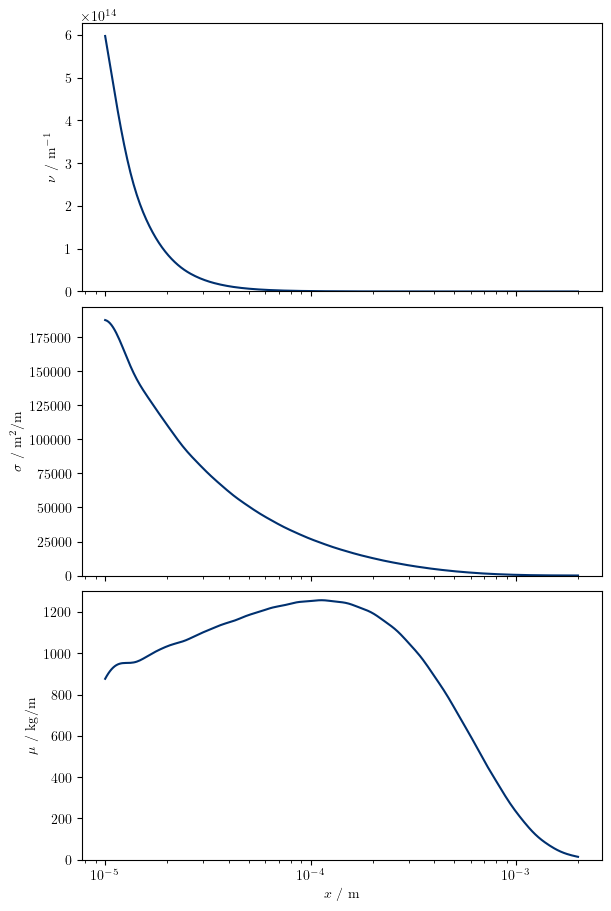

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, constrained_layout=True)

xp = powspace(1e-5, 2e-3, 300)

ax1.plot(xp, exbase.nu(xp))
ax1.set(
    xscale='log', yscale='linear',
    ylabel=r'$\nu\ /\ \mathrm{m^{-1}}$',
    ylim=(0, None)
)
ax2.plot(xp, exbase.sig(xp))
ax2.set(
    yscale='linear',
    ylabel=r'$\sigma\ /\ \mathrm{m^2/m}$',
    ylim=(0, None)
)
ax3.plot(xp, exbase.mu(xp))
ax3.set(
    yscale='linear',
    ylabel=r'$\mu\ /\ \mathrm{kg/m}$',
    xlabel=r'$x\ /\ \mathrm{m}$',
    ylim=(0, 1.3e3)
)
fig.set_size_inches(6, 9)